In [664]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import TimeSeriesSplit
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import (accuracy_score, roc_curve, auc, confusion_matrix, 
                             ConfusionMatrixDisplay, classification_report, 
                             precision_recall_curve)
from sklearn.calibration import calibration_curve
from sklearn.metrics import fbeta_score

In [667]:
Tesla_data.shape[0]

501

In [669]:
Tesla_data = pd.read_csv(r'C:\Users\Zhuge\Downloads\project1\Final_Tesla_stock_sentiment_2018_2020.csv')
Tesla_data = Tesla_data.sort_values(by='Date')


In [671]:
Tesla_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Movement,avg_textblob_polarity,avg_vader_sentiment
0,2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000,0,0.196787,0.209007
1,2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500,-1,0.116292,0.122402
2,2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500,-1,0.089711,0.025241
3,2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000,1,0.158306,0.175258
4,2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000,1,0.133010,0.224582


In [673]:
Tesla_data['avg_textblob_polarity_day_1'] = Tesla_data['avg_textblob_polarity'].shift(1)
Tesla_data['avg_textblob_polarity_day_2'] = Tesla_data['avg_textblob_polarity'].shift(2)
Tesla_data['avg_textblob_polarity_day_3'] = Tesla_data['avg_textblob_polarity'].shift(3)

Tesla_data['avg_vader_sentiment_day_1'] = Tesla_data['avg_vader_sentiment'].shift(1)
Tesla_data['avg_vader_sentiment_day_2'] = Tesla_data['avg_vader_sentiment'].shift(2)
Tesla_data['avg_vader_sentiment_day_3'] = Tesla_data['avg_vader_sentiment'].shift(3)
Tesla_data.dropna(inplace=True)
Tesla_data['Movement_next_day'] = Tesla_data['Movement'].shift(-1)
Tesla_data.dropna(subset=['Movement_next_day'], inplace=True)  
Tesla_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Movement,avg_textblob_polarity,avg_vader_sentiment,avg_textblob_polarity_day_1,avg_textblob_polarity_day_2,avg_textblob_polarity_day_3,avg_vader_sentiment_day_1,avg_vader_sentiment_day_2,avg_vader_sentiment_day_3,Movement_next_day
3,2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000,1,0.158306,0.175258,0.089711,0.116292,0.196787,0.025241,0.122402,0.209007,1.0
4,2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000,1,0.133010,0.224582,0.158306,0.089711,0.116292,0.175258,0.025241,0.122402,-1.0
5,2018-01-09,22.344000,22.586666,21.826668,22.246000,22.246000,107199000,-1,0.143762,0.126118,0.133010,0.158306,0.089711,0.224582,0.175258,0.025241,1.0
6,2018-01-10,22.146667,22.466667,22.000000,22.320000,22.320000,64648500,1,0.131628,0.184732,0.143762,0.133010,0.158306,0.126118,0.224582,0.175258,1.0
7,2018-01-11,22.349333,22.987333,22.217333,22.530001,22.530001,99682500,1,0.132403,0.188651,0.131628,0.143762,0.133010,0.184732,0.126118,0.224582,-1.0


In [675]:
X = Tesla_data[['avg_textblob_polarity_day_1', 'avg_textblob_polarity_day_2', 'avg_textblob_polarity_day_3',
                'avg_vader_sentiment_day_1', 'avg_vader_sentiment_day_2', 'avg_vader_sentiment_day_3']]
y = Tesla_data['Movement_next_day']
train_size = int(len(X) * 0.8)
X_dev, y_dev = X.iloc[:train_size], y.iloc[:train_size]
X_test_final, y_test_final = X.iloc[train_size:], y.iloc[train_size:]
tscv = TimeSeriesSplit(n_splits=10)

In [677]:
classifier = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(interaction_only=True, include_bias=False)),
    ('select', SelectKBest(f_classif, k=10)),  
    ('clf', LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, random_state=42))
])
classifier

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly',
                 PolynomialFeatures(include_bias=False, interaction_only=True)),
                ('select', SelectKBest()),
                ('clf', LogisticRegression(max_iter=1000, random_state=42))])

In [679]:
param_grid = {
    'select__k': [1,2,3,4,5,6, 'all'], 
    'clf__C': [0.01, 0.1, 1, 10, 100], 
    'poly__degree': [1, 2],
    'poly__interaction_only': [True, False],
}

search = RandomizedSearchCV(
    estimator=classifier,
    param_distributions=param_grid,
    n_iter=10,             # 尝试10组参数，可根据需要增加
    cv=tscv,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

search.fit(X_dev, y_dev)

print("Best parameters found by RandomizedSearch:", search.best_params_)
print("Best CV accuracy score:", search.best_score_)

classifier = search.best_estimator_
classifier.fit(X_dev, y_dev)

Best parameters found by RandomizedSearch: {'select__k': 4, 'poly__interaction_only': False, 'poly__degree': 2, 'clf__C': 10}
Best CV accuracy score: 0.513888888888889


Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('select', SelectKBest(k=4)),
                ('clf',
                 LogisticRegression(C=10, max_iter=1000, random_state=42))])

In [681]:
y_pred_test_final = classifier.predict(X_test_final)
test_final_acc = accuracy_score(y_test_final, y_pred_test_final)
print(f"Final Test Accuracy on external test set: {test_final_acc:.4f}")

Final Test Accuracy on external test set: 0.5446


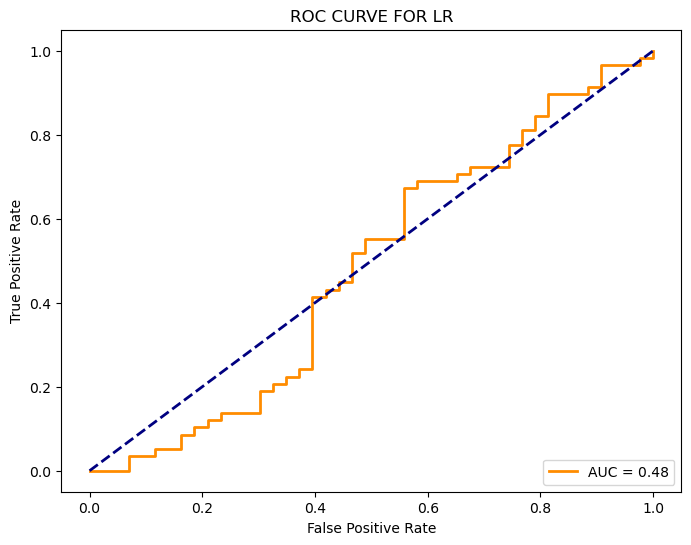

In [683]:
    # 计算ROC曲线

y_proba_test_final = classifier.predict_proba(X_test_final)[:, 1]
fpr, tpr, _ = roc_curve(y_test_final, y_proba_test_final)
roc_auc = auc(fpr, tpr)


# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE FOR LR')
plt.legend(loc='lower right')
plt.show()

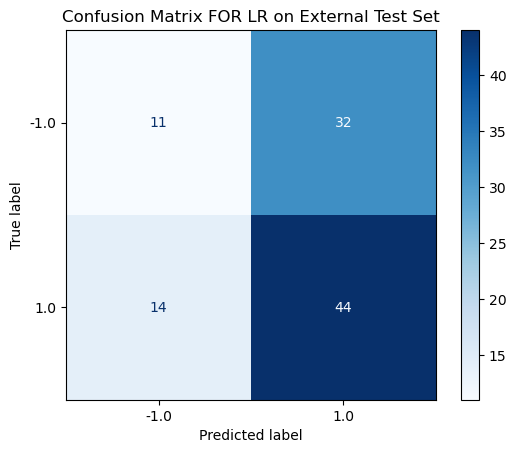

In [685]:
cm = confusion_matrix(y_test_final, y_pred_test_final)

labels = np.unique(y_test_final)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix FOR LR on External Test Set")
plt.show()

In [687]:
f2 = fbeta_score(y_test_final, y_pred_test_final, beta=2, average='binary')
print(f"F2 Score on external test set: {f2:.4f}")

F2 Score on external test set: 0.7143


In [689]:
X_train.head()

,avg_textblob_polarity_day_1,avg_textblob_polarity_day_2,avg_textblob_polarity_day_3,avg_vader_sentiment_day_1,avg_vader_sentiment_day_2,avg_vader_sentiment_day_3
3,0.089711,0.116292,0.196787,0.025241,0.122402,0.209007
4,0.158306,0.089711,0.116292,0.175258,0.025241,0.122402
5,0.133010,0.158306,0.089711,0.224582,0.175258,0.025241
6,0.143762,0.133010,0.158306,0.126118,0.224582,0.175258
7,0.131628,0.143762,0.133010,0.184732,0.126118,0.224582


In [691]:
y_train.head()

3    1.0
4   -1.0
5    1.0
6    1.0
7   -1.0
Name: Movement_next_day, dtype: float64

In [693]:
classifier_SVC_linear = Pipeline([
    ('scaler', StandardScaler()), 
    ('poly', PolynomialFeatures(include_bias=False, interaction_only=True)), 
    ('select', SelectKBest(f_classif, k='all')),  
    ('svc', SVC(kernel='linear', probability=True, random_state=42))
])

param_grid = {
    'poly__degree': [1, 2],         
    'poly__interaction_only': [True],
    'select__k': [1,2,3,4,5,6, 'all'],  
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 100] 
}

grid_search = GridSearchCV(
    estimator=classifier_SVC_linear,
    param_grid=param_grid,
    cv=tscv,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_dev, y_dev)

print("Best parameters found by grid search:", grid_search.best_params_)
print("Best CV accuracy score from grid search:", grid_search.best_score_)


classifier_SVC_linear = grid_search.best_estimator_
classifier_SVC_linear.fit(X_dev, y_dev)

Best parameters found by grid search: {'poly__degree': 1, 'poly__interaction_only': True, 'select__k': 5, 'svc__C': 0.1}
Best CV accuracy score from grid search: 0.5055555555555556


Pipeline(steps=[('scaler', StandardScaler()),
                ('poly',
                 PolynomialFeatures(degree=1, include_bias=False,
                                    interaction_only=True)),
                ('select', SelectKBest(k=5)),
                ('svc',
                 SVC(C=0.1, kernel='linear', probability=True,
                     random_state=42))])

In [695]:
y_pred_test_final = classifier_SVC_linear.predict(X_test_final)
test_final_acc = accuracy_score(y_test_final, y_pred_test_final)
print(f"Final Test Accuracy on external test set: {test_final_acc:.4f}")

Final Test Accuracy on external test set: 0.5248


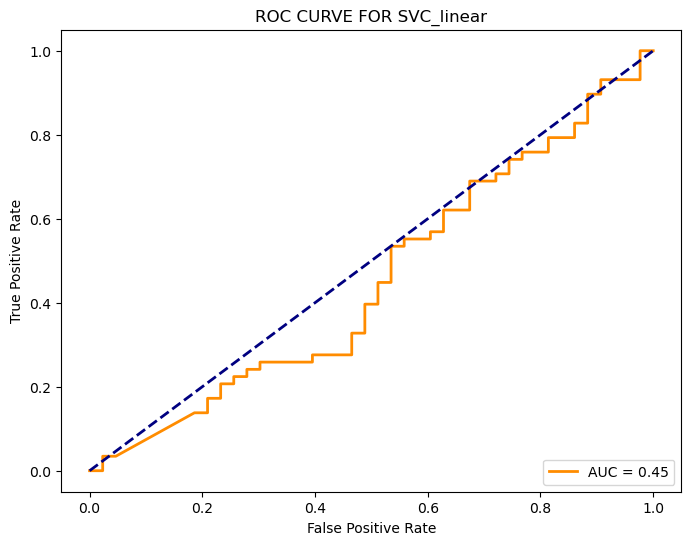

In [697]:
    # 计算ROC曲线
y_proba_test_final = classifier_SVC_linear.predict_proba(X_test_final)[:, 1]
fpr, tpr, _ = roc_curve(y_test_final, y_proba_test_final)
roc_auc = auc(fpr, tpr)


# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE FOR SVC_linear')
plt.legend(loc='lower right')
plt.show()

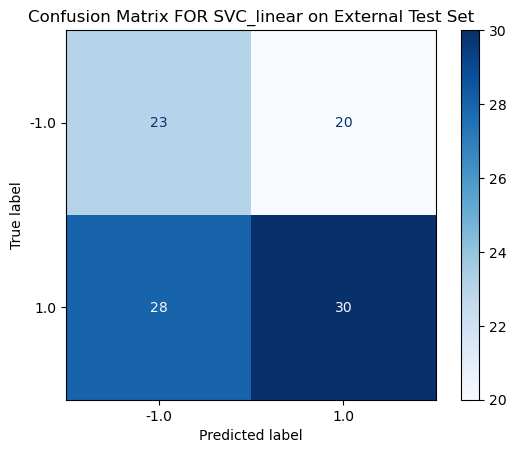

In [699]:
cm = confusion_matrix(y_test_final, y_pred_test_final)

labels = np.unique(y_test_final)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix FOR SVC_linear on External Test Set")
plt.show()

In [701]:
f2 = fbeta_score(y_test_final, y_pred_test_final, beta=2, average='binary')
print(f"F2 Score on external test set: {f2:.4f}")

F2 Score on external test set: 0.5319


In [703]:
#尝试使用rbf分类
classifier_SVC_rbf = Pipeline([
    ('scaler', StandardScaler()), 
    ('poly', PolynomialFeatures(include_bias=False, interaction_only=True)),
    ('select', SelectKBest(f_classif, k='all')),
    ('svc', SVC(kernel='rbf', probability=True, random_state=42))
])

param_grid = {
    'poly__degree': [1, 2],
    'poly__interaction_only': [True],
    'select__k': [1,2,3,4,5,6, 'all'],  
    'svc__C': [0.1, 1, 2, 5, 10],
    'svc__gamma': [0.001, 0.01, 0.1, 1]
}

grid_search = GridSearchCV(
    estimator=classifier_SVC_rbf,
    param_grid=param_grid,
    cv=tscv,
    scoring='accuracy',
    n_jobs=-1  
)

grid_search.fit(X_dev, y_dev)

print("Best parameters found by grid search:", grid_search.best_params_)
print("Best CV score (accuracy) from grid search:", grid_search.best_score_)

classifier_SVC_rbf = grid_search.best_estimator_
classifier_SVC_rbf.fit(X_dev, y_dev)

Best parameters found by grid search: {'poly__degree': 1, 'poly__interaction_only': True, 'select__k': 1, 'svc__C': 10, 'svc__gamma': 1}
Best CV score (accuracy) from grid search: 0.5416666666666667


Pipeline(steps=[('scaler', StandardScaler()),
                ('poly',
                 PolynomialFeatures(degree=1, include_bias=False,
                                    interaction_only=True)),
                ('select', SelectKBest(k=1)),
                ('svc', SVC(C=10, gamma=1, probability=True, random_state=42))])

In [704]:
y_pred_test_final = classifier_SVC_rbf.predict(X_test_final)
test_final_acc = accuracy_score(y_test_final, y_pred_test_final)
print(f"Final Test Accuracy on external test set: {test_final_acc:.4f}")

Final Test Accuracy on external test set: 0.5545


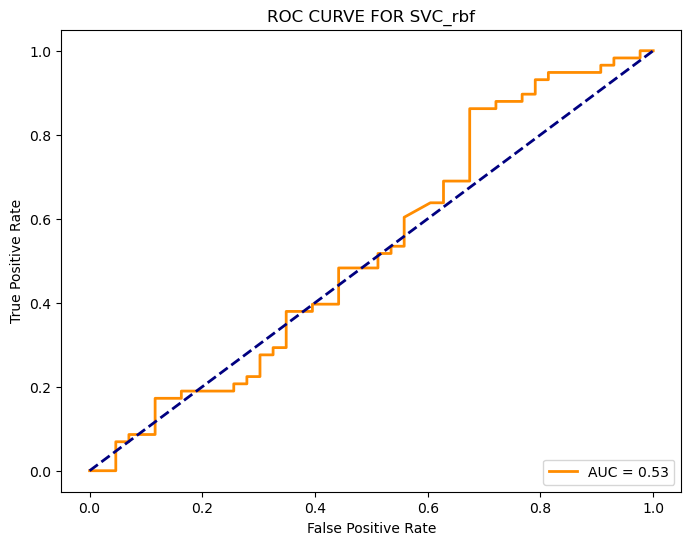

In [707]:
# 计算ROC曲线
y_proba_test_final = classifier_SVC_rbf.predict_proba(X_test_final)[:, 1]
fpr, tpr, _ = roc_curve(y_test_final, y_proba_test_final)
roc_auc = auc(fpr, tpr)


# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE FOR SVC_rbf')
plt.legend(loc='lower right')
plt.show()

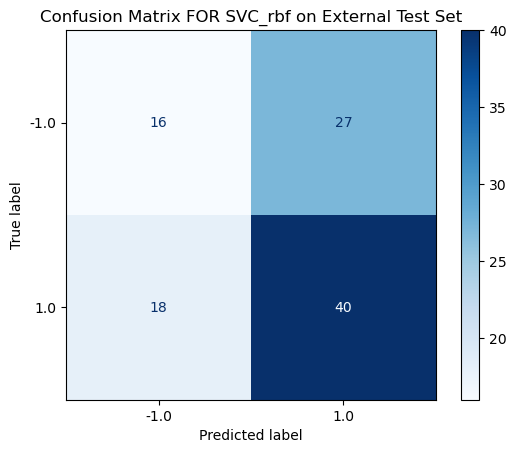

In [709]:
cm = confusion_matrix(y_test_final, y_pred_test_final)

labels = np.unique(y_test_final)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix FOR SVC_rbf on External Test Set")
plt.show()

In [711]:
f2 = fbeta_score(y_test_final, y_pred_test_final, beta=2, average='binary')
print(f"F2 Score on external test set: {f2:.4f}")

F2 Score on external test set: 0.6689


In [650]:
#random forest

classifier_for = Pipeline([
    ('scaler', StandardScaler()),  
    ('select', SelectKBest(f_classif, k=10)), 
    ('clf', RandomForestClassifier(random_state = 42, oob_score=True))  
])


param_grid = {
    'select__k': [1,2,3,4,5,6, 'all'], 
    'clf__n_estimators': [100, 300, 500],
    'clf__max_depth': [None, 5, 10],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': ['sqrt', 'log2', 0.5],
    'clf__criterion': ['gini', 'entropy']
}

grid_search = RandomizedSearchCV(
    estimator = classifier_for,
    param_distributions=param_grid,
    n_iter=50,          
    cv=tscv,
    scoring='accuracy',
    n_jobs=-1,        
    random_state=42
)

grid_search.fit(X_dev, y_dev)

print("Best parameters found by RandomizedSearch:", grid_search.best_params_)
print("Best CV accuracy score from search:", grid_search.best_score_)
classifier_for = grid_search.best_estimator_
classifier_for.fit(X_dev, y_dev)

Best parameters found by RandomizedSearch: {'select__k': 2, 'clf__n_estimators': 300, 'clf__min_samples_split': 10, 'clf__min_samples_leaf': 2, 'clf__max_features': 'sqrt', 'clf__max_depth': None, 'clf__criterion': 'entropy'}
Best CV accuracy score from search: 0.5444444444444445


Pipeline(steps=[('scaler', StandardScaler()), ('select', SelectKBest(k=2)),
                ('clf',
                 RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                                        min_samples_split=10, n_estimators=300,
                                        oob_score=True, random_state=42))])

In [713]:
y_pred_test_final = classifier_for.predict(X_test_final)
test_final_acc = accuracy_score(y_test_final, y_pred_test_final)
print(f"Final Test Accuracy on external test set: {test_final_acc:.4f}")

Final Test Accuracy on external test set: 0.5842


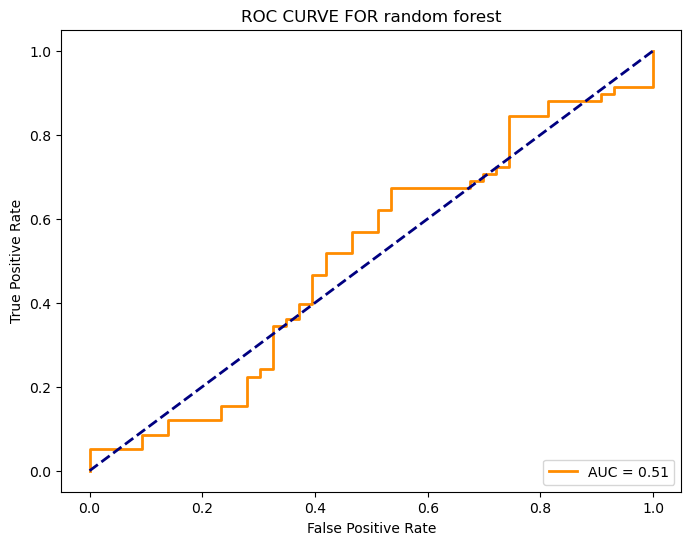

In [715]:
y_proba_test_final = classifier_for.predict_proba(X_test_final)[:, 1]
fpr, tpr, _ = roc_curve(y_test_final, y_proba_test_final)
roc_auc = auc(fpr, tpr)


# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE FOR random forest')
plt.legend(loc='lower right')
plt.show()

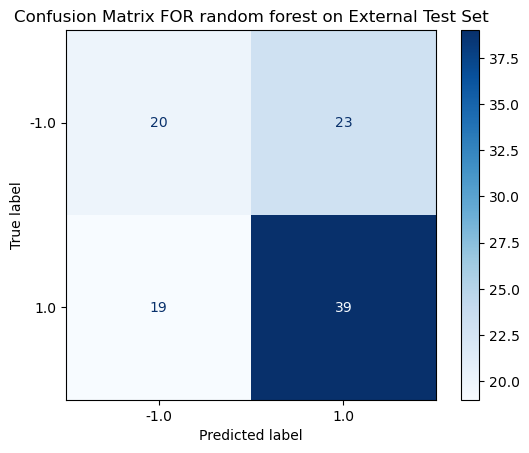

In [717]:
cm = confusion_matrix(y_test_final, y_pred_test_final)

labels = np.unique(y_test_final)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix FOR random forest on External Test Set")
plt.show()

In [662]:
f2 = fbeta_score(y_test_final, y_pred_test_final, beta=2, average='binary')
print(f"F2 Score on external test set: {f2:.4f}")

F2 Score on external test set: 0.6633
